In [1]:
import pandas as pd
from os.path import exists, join, curdir
from os import mkdir, listdir
import numpy as np
from matplotlib import pyplot

In [2]:
LOGDIR = join(curdir, 'logs')

In [3]:
def get_subdirs(logpath = LOGDIR, dataset=None):
    folders = listdir(logpath)
    paths = [join(logpath, file) for file in folders]
    if dataset is None:
        return paths
    else:
        paths = [join(logpath, folder) for folder in folders if folder == dataset]
    return paths
        
def get_files(logpath, dataset):
    model_folders = get_subdirs(logpath)
    dataset_folders = np.array([get_subdirs(model_folder, dataset) for model_folder in model_folders]).flatten()
    filepaths = np.array([[join(dataset_folder, file) for file in listdir(dataset_folder)] for dataset_folder in dataset_folders]).flatten()
    #filepaths = [filepath for filepath in filepaths if 'ADAM' in filepath]
    return list(filepaths)

In [19]:
cifar10 = get_files(LOGDIR, 'Cifar10')
cifar10_gd = [filepath for filepath in cifar10 if not 'ADAM' in filepath]
cifar10_lrs = [filepath for filepath in cifar10 if 'LRS' in filepath]
cifar10_ad = [filepath for filepath in cifar10 if 'ADAM' in filepath]
cifar100 = [filepath for filepath in get_files(LOGDIR, 'Cifar100')][0]
cifar100_ad = [filepath for filepath in cifar100 if 'ADAM' in filepath]
cifar100_ld = [filepath for filepath in cifar100 if not 'ADAM' in filepath]
catdog = get_files(LOGDIR, 'CatVsDog')
catdog = [item for sublist in catdog for item in sublist] 
catdog_ad = [filepath for filepath in catdog if 'ADAM' in filepath]
#print(catdog)

all_sets = cifar100+cifar10+catdog
print(len(all_sets))

639


In [36]:
def compute_avg_sat(df):
    return np.mean(df.values)

def filter_file(file, mode='eval', ignore='_classifier-6', final_epoch=19):
    df = pd.read_csv(file, sep=';', index_col=0)
    df = df[df.index == final_epoch]
    if len(df) == 0:
        return -1, -1, -1
    cols = list(df.columns)
   #print(cols)
    filtered_cols = []
    accuracy = -1
    loss = -1
    avg_sat = -1
    for col in cols:
        if 'accuracy' in col and 'test' in col:
            accuracy = df[col].values[-1]
            continue
        if 'loss' in col and 'test' in col:
            loss = df[col].values[-1]
            continue
        if ignore in col or 'eval' in col or 'test' in col or 'training' in col:
            continue
        print(col)
        filtered_cols.append(col)
    df = df[filtered_cols]
    return compute_avg_sat(df),accuracy, loss
avg_sat, acc, loss = [], [], []

639 639 639


Text(0, 0.5, 'Accuracy')

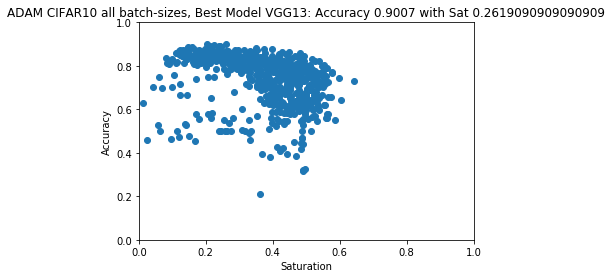

In [37]:
def compute_avg_sat(df):
    return np.mean(df.values)

def filter_file(file, mode='eval', ignore='_classifier-6', final_epoch=19):
    df = pd.read_csv(file, sep=';', index_col=0)
    df = df[df.index == final_epoch]
    if len(df) == 0:
        return -1, -1, -1
    cols = list(df.columns)
   #print(cols)
    filtered_cols = []
    accuracy = -1
    loss = -1
    avg_sat = -1
    for col in cols:
        if 'accuracy' in col and 'test' in col:
            accuracy = df[col].values[0]
            continue
        if 'loss' in col and 'test' in col:
            loss = df[col].values[0]
            continue
        if ignore in col or 'eval' in col or 'test' in col or 'training' in col:
            continue
       #print(col)
        filtered_cols.append(col)
    df = df[filtered_cols]
    return compute_avg_sat(df),accuracy, loss
avg_sat, acc, loss = [], [], []
maximum_acc = -1
for dataset in all_sets:
    if 'bs' in dataset:
        sat, ac, los = filter_file(dataset, final_epoch=19)
        sat = sat / 100
        avg_sat.append(sat)
        acc.append(ac)
        loss.append(los)
        if maximum_acc < ac:
            maximum_acc = ac
            maximum_sat = sat
            best_ds = dataset.split('_bs')[0].split('\\')[-1]
print(len(avg_sat), len(acc), len(loss))
pyplot.scatter(avg_sat, acc)
pyplot.title('ADAM CIFAR10 all batch-sizes, Best Model {}: Accuracy {} with Sat {}'.format(best_ds, maximum_acc, maximum_sat))
pyplot.ylim((0,1))
pyplot.xlim((0,1))
pyplot.xlabel('Saturation')
pyplot.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

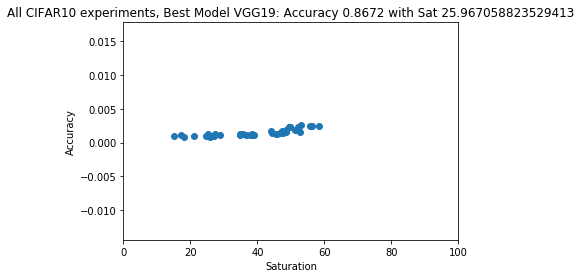

In [56]:
avg_sat, acc, loss, label = [], [], [], []
maximum_acc = -1
for dataset in cifar10_ad:
    if 'bs512' in dataset:
        sat, ac, los = filter_file(dataset, final_epoch=19)
        avg_sat.append(sat)
        acc.append(ac)
        loss.append(los)
        label.append(dataset.split('_bs')[0].split('\\')[-1])
        if maximum_acc < ac:
            maximum_acc = ac
            maximum_sat = sat
            best_dataset = dataset.split('_bs')[0].split('\\')[-1]
#print(len(avg_sat), len(acc), len(loss))
pyplot.scatter(avg_sat, loss, label=label)
#for x,y,l in zip(avg_sat, acc, label):
#    pyplot.annotate(l,(x,y))
pyplot.title('All CIFAR10 experiments, Best Model {}: Accuracy {} with Sat {}'.format(best_dataset ,maximum_acc, maximum_sat))
#pyplot.ylim((0.00, 0.06))#(0,1))
pyplot.xlim((0,100))
pyplot.xlabel('Saturation')
pyplot.ylabel('Accuracy')

In [195]:
catdog

['.\\logs\\VGG11\\CatVsDog\\VGG11_bs128_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs32_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs512_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs60_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs8_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs128_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs32_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs512_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs60_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs8_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs128_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs32_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs512_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs60_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs8_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDog\\VGG11_XXS_bs128_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDog\\VGG11_XXS_bs32_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDo